## isochrones
* Morton+2015

In [ ]:
%load init_ipynb

In [2]:
import sys

try: 
    import isochrones
except:
    !{sys.executable} -m pip install --upgrade isochrones
    import isochrones

isochrones.__version__

Holoviews not imported. Some visualizations will not be available.
PyMultiNest not imported.  MultiNest fits will not work.


'2.1'

In [3]:
# See page 5 in http://waps.cfa.harvard.edu/MIST/README_tables.pdf

eep_dict = {
    1: 'pre-main sequence (PMS)',
    202: 'zero age main sequence (ZAMS)',
    353: 'intermediate age main sequence (IAMS )',
    454: 'terminal age main sequence (TAMS)',
    605: 'tip of the red giant branch (RGBTip)',
    631: 'zero age core helium burning (ZACHeB)',
    707: 'terminal age core helium burning (TACHeB)'
}

### MIST Isochrones grid

In [4]:
from isochrones.mist import MISTIsochroneGrid


iso_grid = MISTIsochroneGrid()
iso_grid.df.head()

eep  age       feh      mass  initial_mass  \
log10_isochrone_age_yr feh  EEP                                               
5.0                    -4.0 35    35  5.0 -3.978406  0.100000      0.100000   
                            36    36  5.0 -3.978406  0.102885      0.102885   
                            37    37  5.0 -3.978406  0.107147      0.107147   
                            38    38  5.0 -3.978406  0.111379      0.111379   
                            39    39  5.0 -3.978406  0.115581      0.115581   

                                   radius   density   logTeff         Teff  \
log10_isochrone_age_yr feh  EEP                                              
5.0                    -4.0 35   1.106082  0.104181  3.617011  4140.105252   
                            36   1.122675  0.102504  3.618039  4149.909661   
                            37   1.147702  0.099918  3.619556  4164.436984   
                            38   1.173015  0.097284  3.621062  4178.903372   
                            39   1.198615  0.094623  3.622555  4193.289262   

                                     logg      logL      Mbol   delta_nu  \
log10_isochrone_age_yr feh  EEP                                            
5.0                    -4.0 35   3.350571 -0.489734  5.964335  37.987066   
                            36   3.347798 -0.472691  5.921728  37.739176   
                            37   3.343658 -0.447471  5.858678  37.345115   
                            38   3.339612 -0.422498  5.796244  36.923615   
                            39   3.335660 -0.397776  5.734440  36.473151   

                                     nu_max  phase   dm_deep  
log10_isochrone_age_yr feh  EEP                               
5.0                    -4.0 35   299.346079   -1.0  0.002885  
                            36   298.570836   -1.0  0.003573  
                            37   297.180748   -1.0  0.004247  
                            38   295.526946   -1.0  0.004217  
                            39   293.589960   -1.0  0.004189

In [5]:
#get unique indices

iso_grid_indices = {}
for i in range(3):
    index = iso_grid.df.index.get_level_values(i)
    iso_grid_indices[index.name] = index.unique()

In [6]:
iso_grid_indices.keys()

dict_keys(['log10_isochrone_age_yr', 'feh', 'EEP'])

In [7]:
iso_grid_indices['feh']

Float64Index([ -4.0,  -3.5,  -3.0,  -2.5,  -2.0, -1.75,  -1.5, -1.25,  -1.0,
              -0.75,  -0.5, -0.25,   0.0,  0.25,   0.5],
             dtype='float64', name='feh')

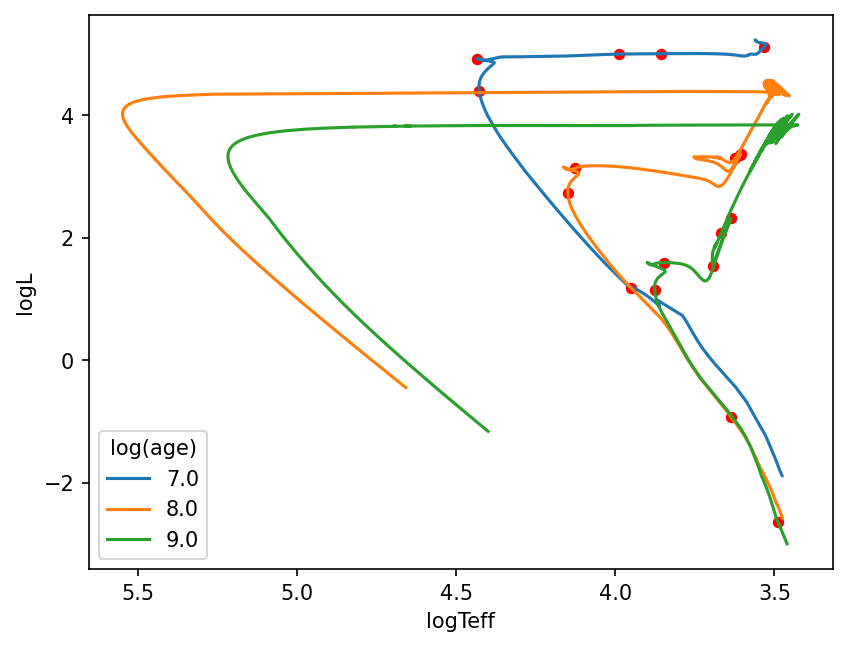

In [8]:
import matplotlib.pyplot as pl

feh0 = 0.0
logAges = [7.0,8.0,9.0]

fig, ax = pl.subplots(dpi=150)

x, y = 'logTeff', 'logL'
for age in logAges:
    iso_df = iso_grid.df.xs((age, feh0), level=(0,1))
    #plot isochrones
    iso_df.plot(x, y, label=f"{age:.1f}", ax=ax)
    #mark EEPs
    eep_indices = iso_df.index.isin(eep_dict.keys())
    #plot EEPs
    iso_df[eep_indices].plot.scatter(x, y, c='r', ax=ax)
    ax.legend(title=f"log(age)")
    ax.invert_xaxis()

In [9]:
eep_dict

{1: 'pre-main sequence (PMS)',
 202: 'zero age main sequence (ZAMS)',
 353: 'intermediate age main sequence (IAMS )',
 454: 'terminal age main sequence (TAMS)',
 605: 'tip of the red giant branch (RGBTip)',
 631: 'zero age core helium burning (ZACHeB)',
 707: 'terminal age core helium burning (TACHeB)'}

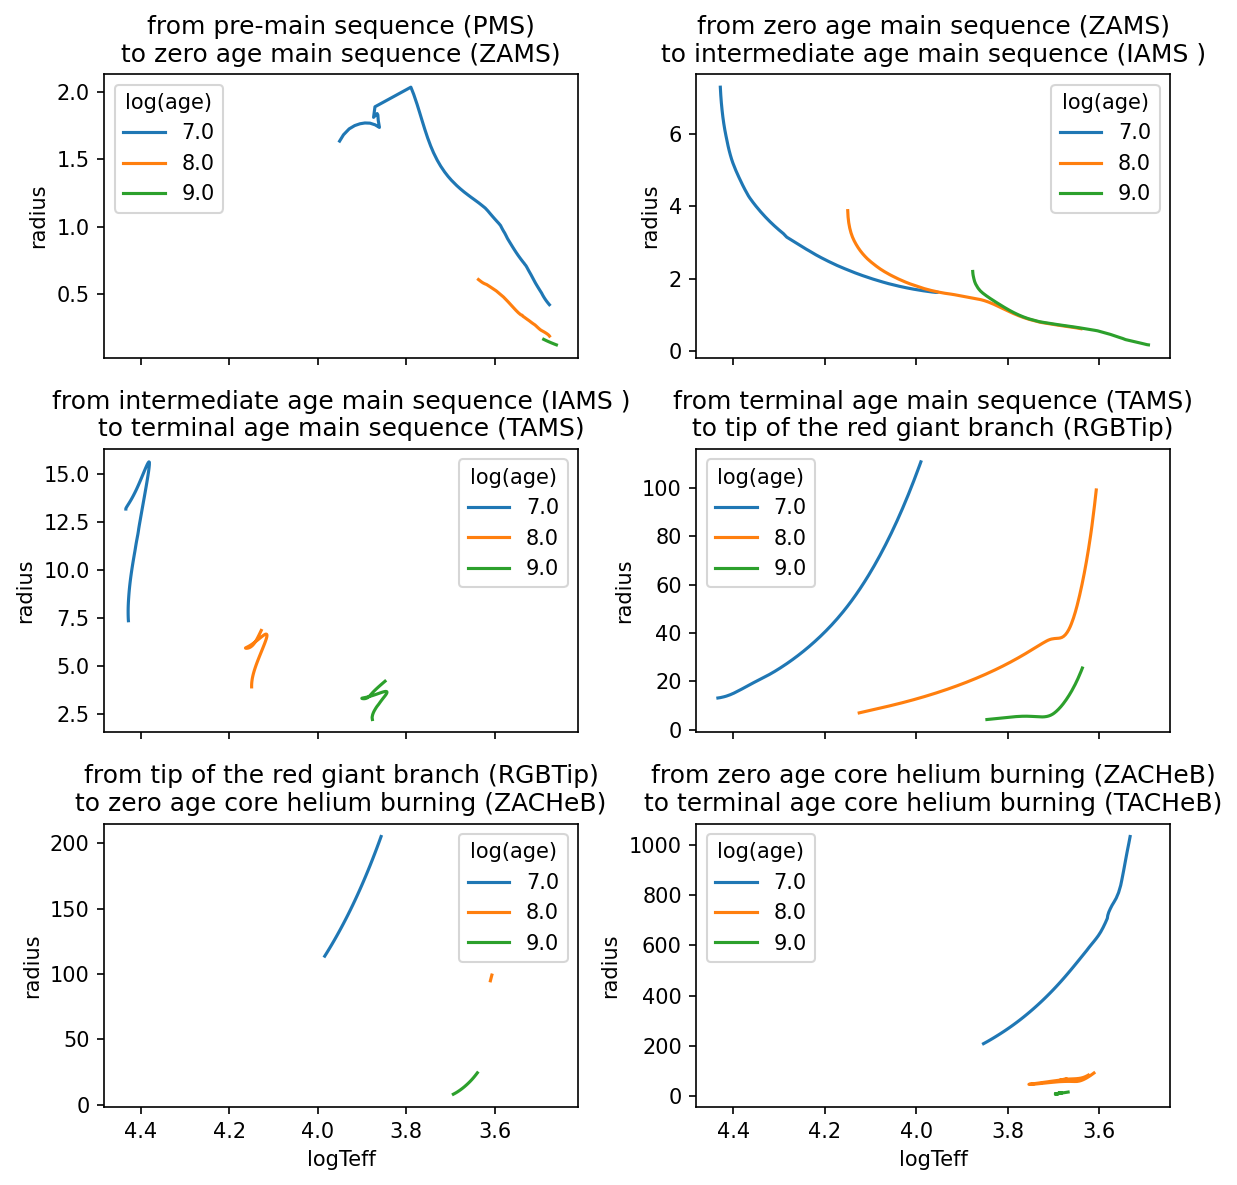

In [10]:
import numpy as np

eeps = list(eep_dict.keys())

fig, axes = pl.subplots(3, 2, 
                        figsize=(8, 8),
                        sharex='col',
                        # sharey='row',
                        tight_layout=True,
                        dpi=150
                        )

x, y = 'logTeff', 'radius'
for age in logAges:
    iso_df = iso_grid.df.xs((age, feh0), level=(0,1))
    # plot isochrones
    iso_df_eeps = np.array(iso_df.index.tolist())
    for n,eep in enumerate(eeps[:-1]):
        stage_start = eep_dict[eep]
        stage_end = eep_dict[eeps[n+1]]
        ax = axes.flatten()[n]
        idx = (iso_df_eeps>eeps[n]) & (iso_df_eeps<=eeps[n+1])
        # idx = (iso_df_eeps>eeps[n-1]) & (iso_df_eeps<=eeps[n])
        iso_df[idx].plot(x, y, label=f"{age:.1f}", ax=ax)
        ax.set_ylabel(y)
        ax.set_title(f"from {stage_start}\nto {stage_end}")
        ax.legend(title="log(age)")
        ax.invert_xaxis()

### MIST Evolution tracks grid

In [11]:
from isochrones.mist import MISTEvolutionTrackGrid

track_grid = MISTEvolutionTrackGrid()
track_grid.df.head()

delta_nu    radius   logTeff       feh  \
initial_feh initial_mass EEP                                            
-4.0        0.1          1    21.776686  1.593804  3.620834 -3.978406   
                         2    21.993078  1.583455  3.620769 -3.978406   
                         3    22.219791  1.572790  3.620702 -3.978406   
                         4    22.457004  1.561817  3.620631 -3.978406   
                         5    22.706349  1.550499  3.620558 -3.978406   

                              initial_mass      logg      logL  eep      Mbol  \
initial_feh initial_mass EEP                                                    
-4.0        0.1          1             0.1  3.033277 -0.157148  1.0  5.132871   
                         2             0.1  3.038935 -0.163066  2.0  5.147664   
                         3             0.1  3.044805 -0.169206  3.0  5.163015   
                         4             0.1  3.050886 -0.175569  4.0  5.178922   
                         5             0.1  3.057203 -0.182181  5.0  5.195452   

                              phase         Teff  mass      nu_max   density  \
initial_feh initial_mass EEP                                                   
-4.0        0.1          1     -1.0  4176.707371   0.1  143.524548  0.034821   
                         2     -1.0  4176.085183   0.1  145.419039  0.035509   
                         3     -1.0  4175.435381   0.1  147.409881  0.036236   
                         4     -1.0  4174.757681   0.1  149.499346  0.037005   
                         5     -1.0  4174.049081   0.1  151.703570  0.037821   

                              interpolated      star_age       age   dt_deep  
initial_feh initial_mass EEP                                                  
-4.0        0.1          1           False  13343.289397  4.125263  0.026168  
                         2           False  14171.978264  4.151430  0.026121  
                         3           False  15048.910447  4.177505  0.026016  
                         4           False  15975.827275  4.203463  0.025996  
                         5           False  16962.744747  4.229496  0.025996

In [12]:
#get unique indices

track_grid_indices = {}
for i in range(3):
    index = track_grid.df.index.get_level_values(i)
    track_grid_indices[index.name] = index.unique()

In [13]:
track_grid_indices.keys()

dict_keys(['initial_feh', 'initial_mass', 'EEP'])

In [14]:
track_grid_indices['initial_mass']

Float64Index([  0.1,  0.15,   0.2,  0.25,   0.3,  0.31,  0.32,  0.33,  0.34,
               0.35,
              ...
              135.0, 140.0, 145.0, 150.0, 175.0, 200.0, 225.0, 250.0, 275.0,
              300.0],
             dtype='float64', name='initial_mass', length=196)

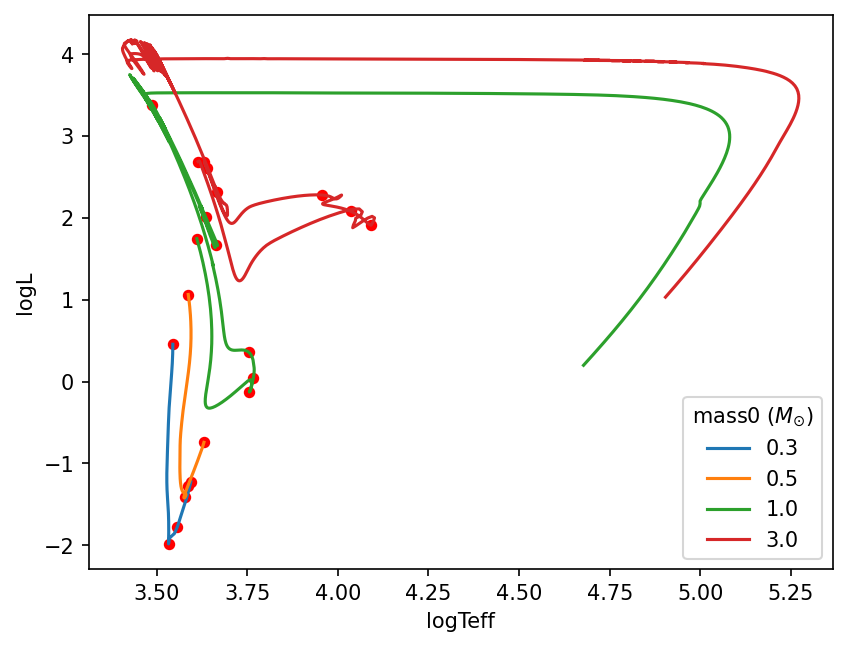

In [15]:
import matplotlib.pyplot as pl

feh0 = 0.0
masses = [0.3,0.5,1.0, 3.0]
legend = "mass0 ($M_{\odot}$)"

x, y = 'logTeff', 'logL'

fig, ax = pl.subplots(dpi=150)

for mass0 in masses:
    track_df = track_grid.df.xs((feh0, mass0), level=(0,1))
    #plot tracks
    track_df.plot(x, y, label=f"{mass0:.1f}", ax=ax)
    #mark EEPs
    eep_indices = track_df.index.isin(eep_dict.keys())
    #plot EEPs
    track_df[eep_indices].plot.scatter(x, y, c='r', ax=ax)
    ax.legend(title=legend)
    ax.invert_xaxis()

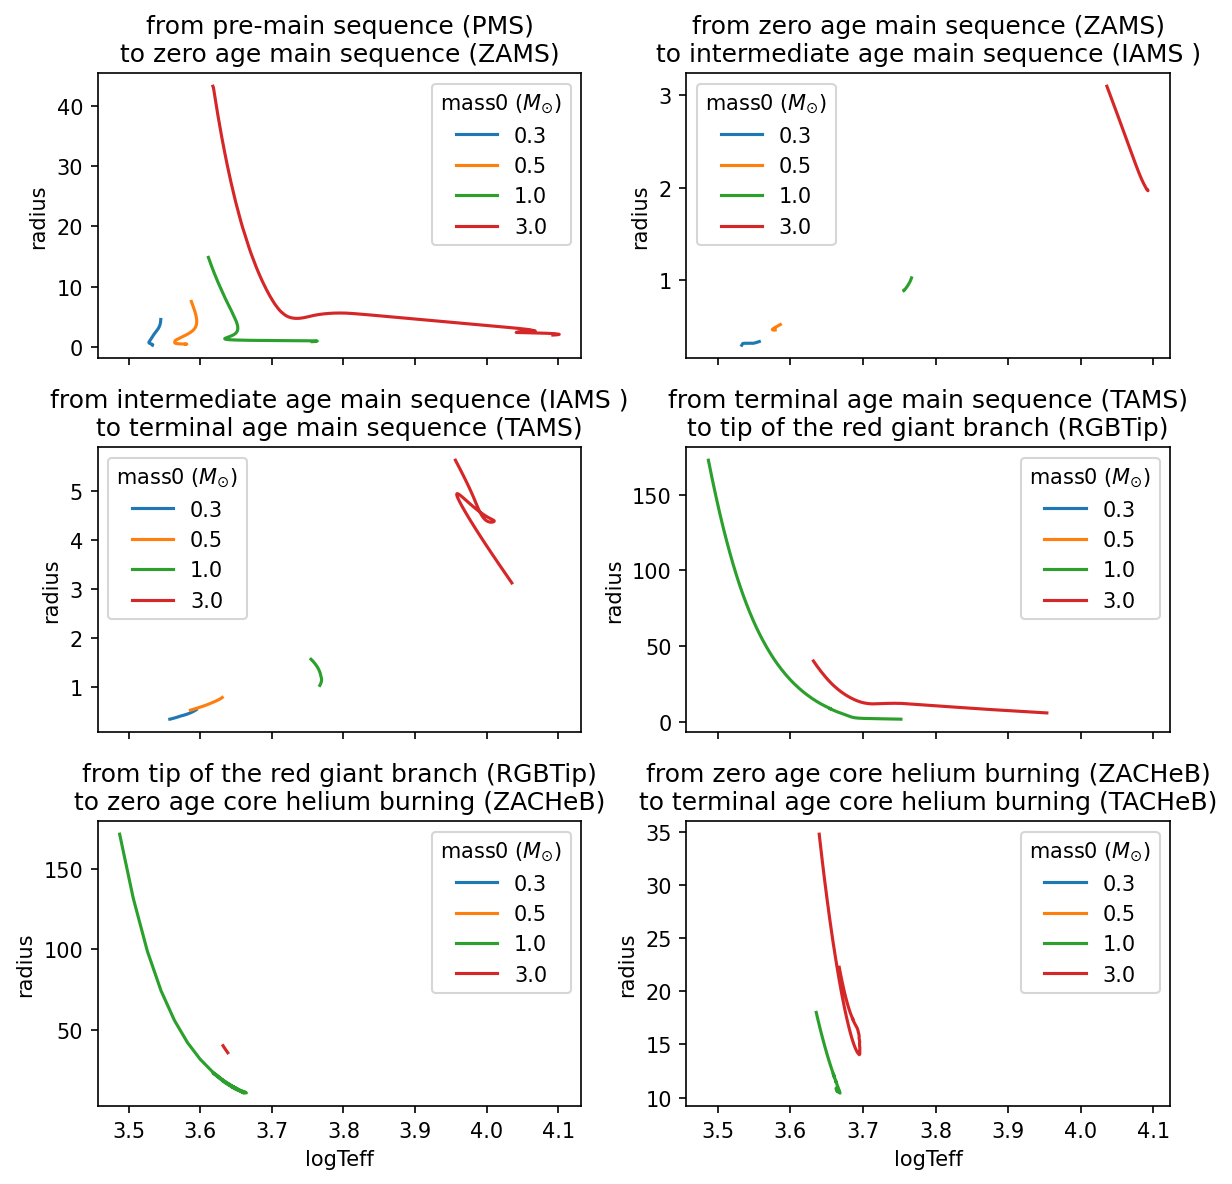

In [16]:
import matplotlib.pyplot as pl

feh0 = 0.0
masses = [0.3,0.5,1.0, 3.0]
legend = "mass0 ($M_{\odot}$)"

x, y = 'logTeff', 'radius'

fig, axes = pl.subplots(3, 2, 
                        figsize=(8, 8),
                        sharex='col',
                        # sharey='row',
                        tight_layout=True,
                        dpi=150
                        )

for mass0 in masses:
    track_df = track_grid.df.xs((feh0, mass0), level=(0,1))
    #plot tracks
    track_df_eeps = np.array(track_df.index.tolist())
    for n,eep in enumerate(eeps[:-1]):
        stage_start = eep_dict[eep]
        stage_end = eep_dict[eeps[n+1]]
        ax = axes.flatten()[n]
        idx = (track_df_eeps>eeps[n]) & (track_df_eeps<=eeps[n+1])
        # idx = (iso_df_eeps>eeps[n-1]) & (iso_df_eeps<=eeps[n])
        track_df[idx].plot(x, y, label=f"{mass0:.1f}", ax=ax)
        ax.set_ylabel(y)
        ax.set_title(f"from {stage_start}\nto {stage_end}")    
        ax.legend(title=legend)
    ax.invert_xaxis()